#  Boosted Decision Trees and Support Vector Machines


## Defining the Question


### a) Specifying the Data Analytic Question
Determine whether the patient has hypothyroid based on the given patient's symptoms tests.




 ### b) Defining the Metric for Success
1.A boosted decision tree model with accuracy score above 90 %

2.A support Vector Machine model with accuracy score above 90 %

### c) Understanding the context
Hypothyroidism: (Underactive Thyroid) Too Little Thyroid Hormone Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid


### d) Recording the Experimental Design
* Data preparation
* Data analysis
* Data modeling

e) Data Relevance
* The provided data was appropriate for the classification analysis that was needed

## Loading the required libraries


In [ ]:
# Loading the labraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Reading the dataset
hypo = pd.read_csv('/content/hypothyroid.csv')
hypo.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


In [ ]:
# Checking the tail of the dataset
hypo.tail(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


             Previewing information of our dataset



In [ ]:
# checking shape of the data set
hypo.shape

(3163, 26)

In [ ]:
# Checking info of the data set
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
# checking the dtypes of dataset
hypo.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## Data cleaning



In [ ]:
# checking for outliers
Q1 =  hypo.quantile(.25)
Q3 = hypo.quantile(.75)
IQR = Q3 - Q1
((hypo < (Q1 - 1.5 * IQR)) |(hypo > (Q3 + 1.5 * IQR)))


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3161,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# checking for  null values
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
# checking for duplicated values
hypo.duplicated().sum()

77

In [ ]:
# Dropping the duplicated values
hypo.drop_duplicates(inplace=True)

In [ ]:
# Checking for unique  values in columns
for columns in hypo.columns:
  print('/n')
  print(hypo[columns].unique())

/n
['hypothyroid' 'negative']
/n
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
/n
['M' 'F' '?']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['y' 'n']
/n
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43'

In [ ]:
# Converting columns in lowwercase
hypo.columns = hypo.columns.str.strip().str.lower()
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
#replacing the '?' in the sex column with the mode and confirming if it was changed
hypo['age']=hypo['age'].replace(['?'],np.nan)
hypo['tsh']=hypo['tsh'].replace(['?'],np.nan)
hypo['t3']=hypo['t3'].replace(['?'],np.nan)
hypo['tt4']=hypo['tt4'].replace(['?'],np.nan)
hypo['t4u']=hypo['t4u'].replace(['?'],np.nan)
hypo['fti']=hypo['fti'].replace(['?'],np.nan)
hypo['tbg']=hypo['tbg'].replace(['?'],np.nan)

In [ ]:
# replace  null values with mode
for column in hypo.columns:
  hypo[column].fillna(hypo[column].mode()[0])


In [ ]:
# converting numerical columns from object to numerical
hypo[['age','tsh','t3','tt4','t4u','fti','tbg']] = hypo[['age','tsh','t3','tt4','t4u','fti','tbg']].apply(pd.to_numeric)

In [ ]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
# converting columns from float to category  
hypo[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","tsh_measured","t3_measured","tt4_measured","t4u_measured","fti_measured","tbg_measured"]] = hypo[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","tsh_measured","t3_measured","tt4_measured","t4u_measured","fti_measured","tbg_measured"]].astype('category')

In [ ]:
# checking for null values
hypo.isnull().sum()

status                          0
age                           438
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

In [ ]:
# filling nan with mode
hypo.replace('?',np.nan,inplace=True)
hypo['sex'].fillna(hypo['sex'].mode()[0],inplace=True)
hypo['age'].fillna(hypo['age'].mode()[0],inplace=True)
hypo['tsh'].fillna(hypo['tsh'].mode()[0],inplace=True)
hypo['tt4'].fillna(hypo['tt4'].mode()[0],inplace=True)
hypo['t4u'].fillna(hypo['t4u'].mode()[0],inplace=True)
hypo['fti'].fillna(hypo['fti'].mode()[0],inplace=True)
hypo['tbg'].fillna(hypo['tbg'].mode()[0],inplace=True)
hypo['t3'].fillna(hypo['t3'].mode()[0],inplace=True)

In [ ]:
# Checking for null values
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


In [ ]:
# Encoding the columns
hypo['status']= label_encoder.fit_transform(hypo['status'])
hypo['sex']= label_encoder.fit_transform(hypo['sex'])
hypo['on_thyroxine']= label_encoder.fit_transform(hypo['on_thyroxine'])
hypo['lithium']= label_encoder.fit_transform(hypo['lithium'])
hypo['query_on_thyroxine']= label_encoder.fit_transform(hypo['query_on_thyroxine'])
hypo['on_antithyroid_medication']= label_encoder.fit_transform(hypo['on_antithyroid_medication'])
hypo['thyroid_surgery']= label_encoder.fit_transform(hypo['thyroid_surgery'])
hypo['query_hypothyroid']= label_encoder.fit_transform(hypo['query_hypothyroid'])
hypo['query_hyperthyroid']= label_encoder.fit_transform(hypo['query_hyperthyroid'])
hypo['pregnant']= label_encoder.fit_transform(hypo['pregnant'])
hypo['sick']= label_encoder.fit_transform(hypo['sick'])  
hypo['tumor']= label_encoder.fit_transform(hypo['tumor'])
hypo['goitre']= label_encoder.fit_transform(hypo['goitre'])
hypo['tsh_measured']= label_encoder.fit_transform(hypo['tsh_measured'])
hypo['t3_measured']= label_encoder.fit_transform(hypo['t3_measured'])
hypo['tt4_measured']= label_encoder.fit_transform(hypo['tt4_measured'])
hypo['t4u_measured']= label_encoder.fit_transform(hypo['t4u_measured'])
hypo['fti_measured']= label_encoder.fit_transform(hypo['fti_measured'])
hypo['tbg_measured']= label_encoder.fit_transform(hypo['tbg_measured'])
hypo['tbg']= label_encoder.fit_transform(hypo['tbg'])

In [ ]:
# Preview the data set
hypo.head(1)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,16


## Exploratory analysis

In [ ]:
# Describe the info
hypo.describe().T

,count,mean,std,min,25%,50%,75%,max
status,3086.0,0.954310,0.208846,0.0,1.00,1.00,1.00,1.00
age,3086.0,52.232016,18.065430,1.0,38.00,58.00,64.00,98.00
sex,3086.0,0.289695,0.453694,0.0,0.00,0.00,1.00,1.00
on_thyroxine,3086.0,0.144524,0.351677,0.0,0.00,0.00,0.00,1.00
query_on_thyroxine,3086.0,0.017822,0.132327,0.0,0.00,0.00,0.00,1.00
on_antithyroid_medication,3086.0,0.013610,0.115883,0.0,0.00,0.00,0.00,1.00
thyroid_surgery,3086.0,0.033377,0.179647,0.0,0.00,0.00,0.00,1.00
query_hypothyroid,3086.0,0.076150,0.265282,0.0,0.00,0.00,0.00,1.00
query_hyperthyroid,3086.0,0.076150,0.265282,0.0,0.00,0.00,0.00,1.00
pregnant,3086.0,0.019767,0.139220,0.0,0.00,0.00,0.00,1.00


In [ ]:
# mean for every column in our dataset
hypo.mean().sort_values(ascending=False)

fti                          114.140279
tt4                          107.874238
age                           52.232016
tbg                           16.596889
tsh                            4.952793
t3                             1.860143
t4u                            0.977748
status                         0.954310
fti_measured                   0.922878
t4u_measured                   0.922553
tt4_measured                   0.922229
tsh_measured                   0.852560
t3_measured                    0.779650
sex                            0.289695
on_thyroxine                   0.144524
tbg_measured                   0.081335
query_hypothyroid              0.076150
query_hyperthyroid             0.076150
thyroid_surgery                0.033377
sick                           0.031432
goitre                         0.031108
pregnant                       0.019767
query_on_thyroxine             0.017822
on_antithyroid_medication      0.013610
tumor                          0.012962


In [ ]:
# skweness of our dataset
hypo.skew().sort_values(ascending=False)

lithium                      39.261928
tsh                          11.115662
tumor                         8.615990
on_antithyroid_medication     8.399915
query_on_thyroxine            7.292388
pregnant                      6.903380
tbg                           5.692025
fti                           5.440344
goitre                        5.404288
sick                          5.373542
thyroid_surgery               5.198265
query_hypothyroid             3.197543
query_hyperthyroid            3.197543
tbg_measured                  3.064716
t3                            2.602941
on_thyroxine                  2.022919
tt4                           1.575207
t4u                           0.988659
sex                           0.927677
age                          -0.351370
t3_measured                  -1.350050
tsh_measured                 -1.989775
tt4_measured                 -3.154732
t4u_measured                 -3.163196
fti_measured                 -3.171708
status                   

In [ ]:
# median for our dataset
hypo.median().sort_values(ascending=False)

fti                          105.00
tt4                          100.00
age                           58.00
tbg                           16.00
t3                             1.60
tsh_measured                   1.00
t3_measured                    1.00
status                         1.00
tt4_measured                   1.00
fti_measured                   1.00
t4u_measured                   1.00
t4u                            0.98
tsh                            0.40
thyroid_surgery                0.00
sex                            0.00
on_thyroxine                   0.00
query_on_thyroxine             0.00
on_antithyroid_medication      0.00
query_hyperthyroid             0.00
query_hypothyroid              0.00
pregnant                       0.00
sick                           0.00
tumor                          0.00
tbg_measured                   0.00
goitre                         0.00
lithium                        0.00
dtype: float64

In [ ]:
hypo.std().sort_values(ascending=False)

fti                          57.969106
tt4                          42.932366
tsh                          22.276447
age                          18.065430
tbg                           3.549900
t3                            0.875818
sex                           0.453694
t3_measured                   0.414550
tsh_measured                  0.354602
on_thyroxine                  0.351677
tbg_measured                  0.273393
tt4_measured                  0.267854
t4u_measured                  0.267342
fti_measured                  0.266829
query_hyperthyroid            0.265282
query_hypothyroid             0.265282
t4u                           0.216874
status                        0.208846
thyroid_surgery               0.179647
sick                          0.174511
goitre                        0.173638
pregnant                      0.139220
query_on_thyroxine            0.132327
on_antithyroid_medication     0.115883
tumor                         0.113128
lithium                  

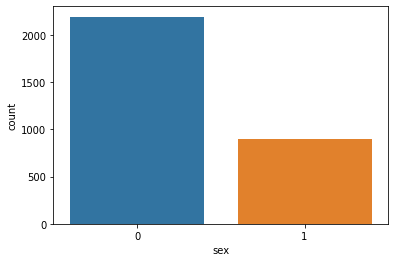

In [ ]:
# graph for sex
sns.countplot(x=hypo['sex'],label = 'counts');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

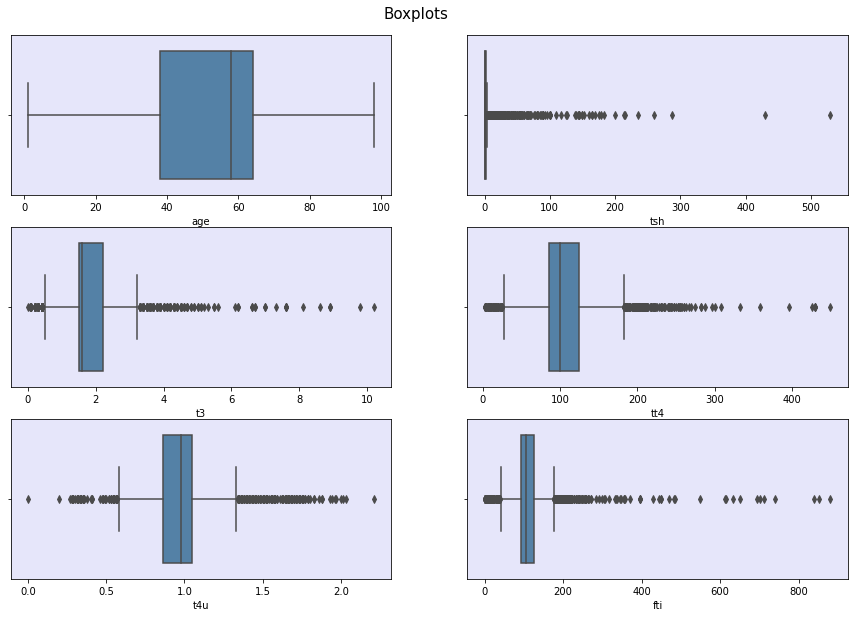

In [ ]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age','tsh','t3','tt4','t4u','fti']
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), hypo, col_list, colors):
  sns.boxplot(hypo[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

 *  *t4u , fti , tt4 , t3 and tsh have a large number of outliers* *italicized text*

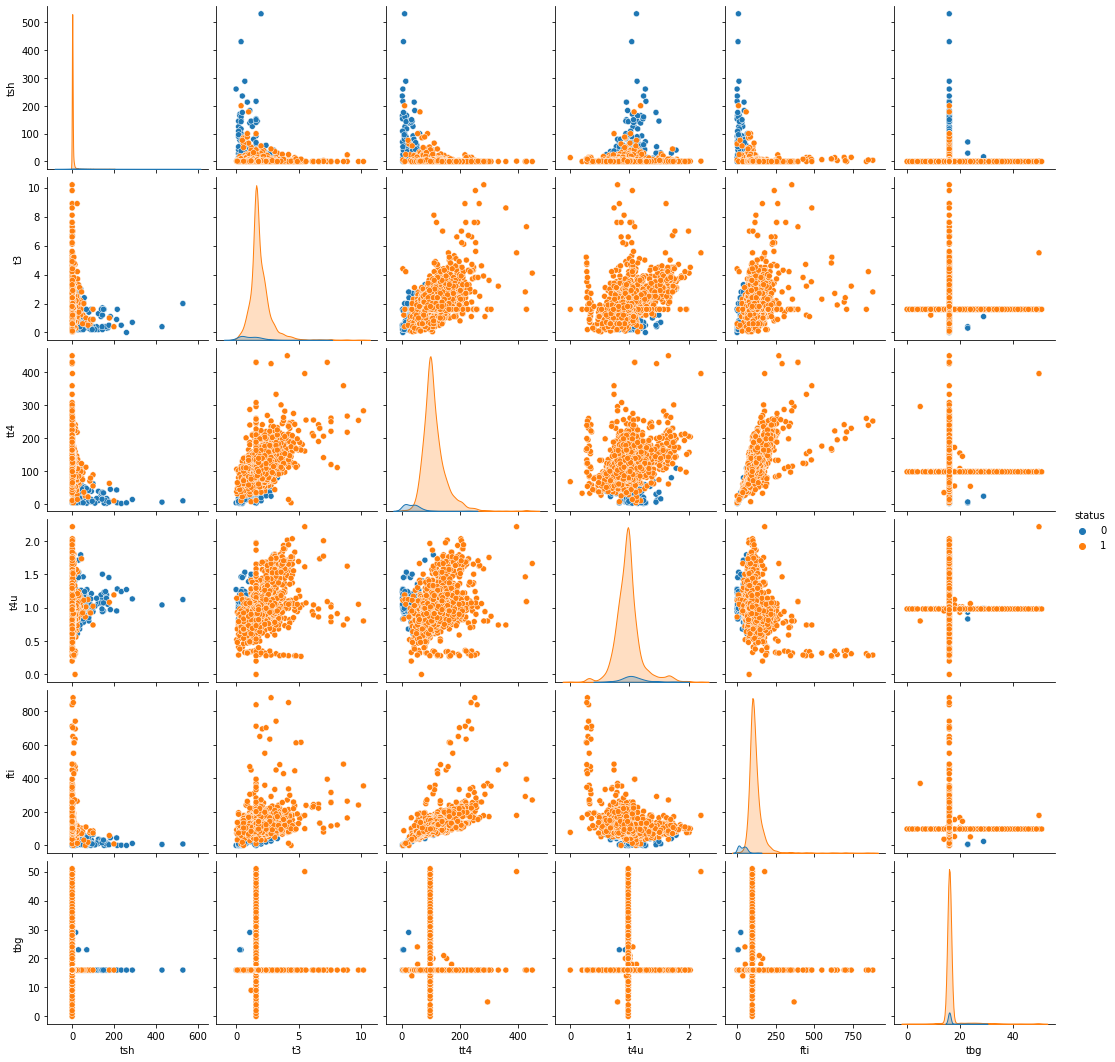

In [ ]:
# plotting pairplot
sns.pairplot(data= hypo,vars=['tsh','t3','tt4','t4u','fti','tbg'],hue='status');

We can see that its not easy to separate the status class 

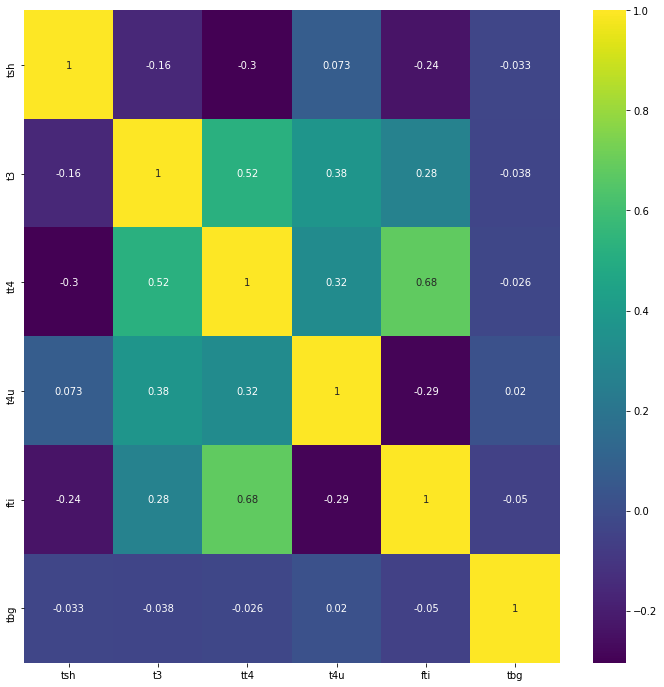

In [ ]:
# plotting heatmap
col=['tsh','t3','tt4','t4u','fti','tbg']
plt.figure(figsize=(12,12))
sns.heatmap(hypo[col].corr(),annot=True,cmap='viridis')
plt.show()

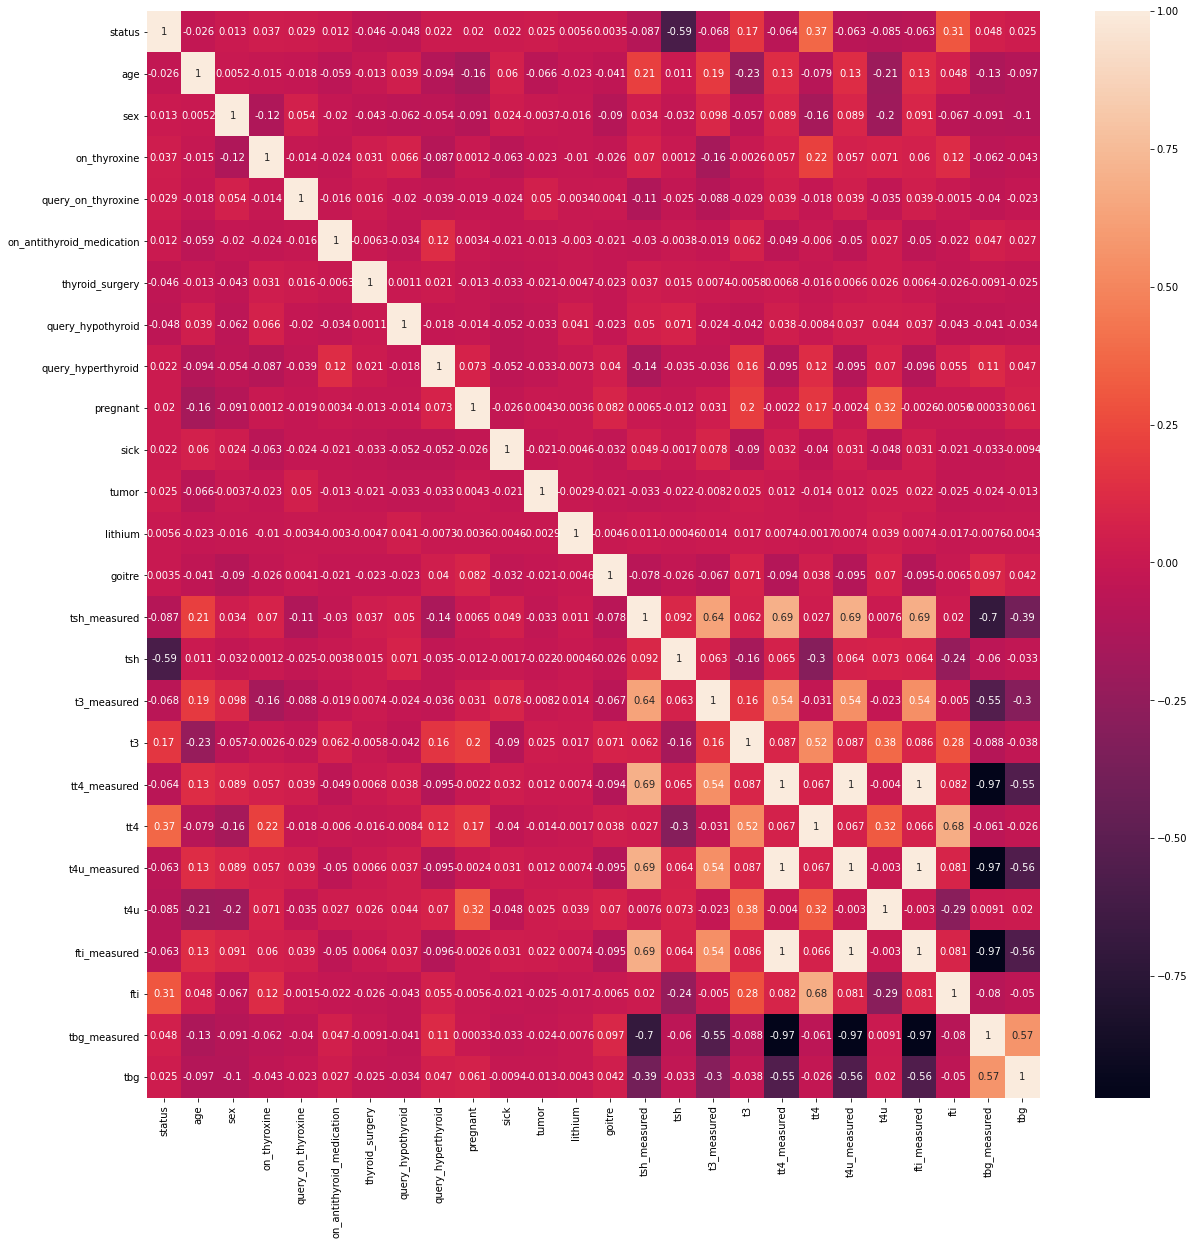

In [ ]:
# plotting heat map for our dataset
plt.figure(figsize=(20,20))
sns.heatmap(hypo.corr(),annot=True)
plt.show()

## Building model

### Building  a model that predicts if a patient has hypothyroid or not


In [ ]:
# Creating features and label
X = hypo.drop('status',axis=1)
y = hypo['status']

In [ ]:
# importing Random  tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#
forest = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=20,max_depth=5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# predicting y values
y_pred = forest.predict(X_test)

In [ ]:
# importing metrics for performance and evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
b = accuracy_score(y_test,y_pred)
print("accuracy score is:",b)

accuracy score is: 0.9773462783171522


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


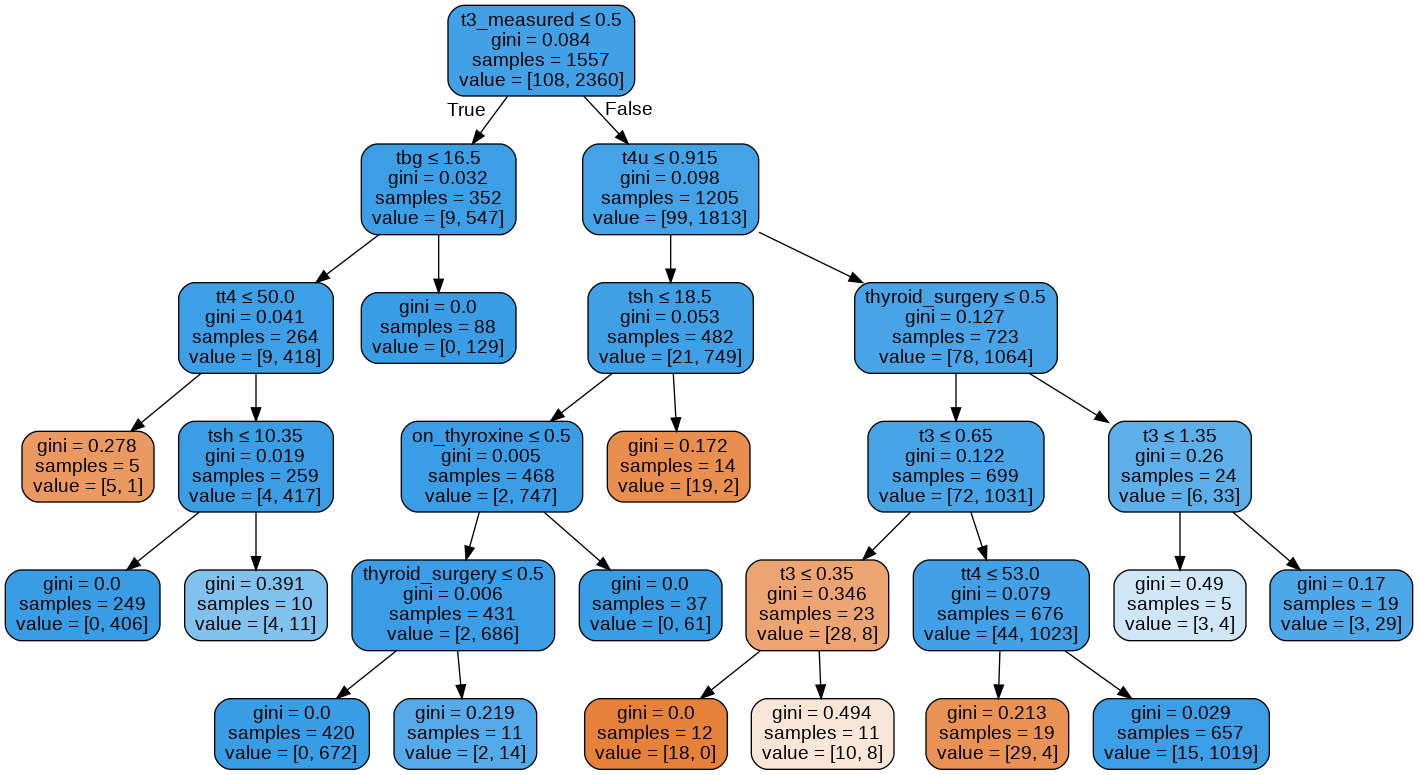

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# Performance of individual decision trees
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [ ]:
#  printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 19  11]
 [  3 585]]


In [ ]:
# printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.98      0.99      0.99       588

    accuracy                           0.98       618
   macro avg       0.92      0.81      0.86       618
weighted avg       0.98      0.98      0.98       618



In [ ]:
tree.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 6.88499434e-06, 0.00000000e+00,
       0.00000000e+00, 7.84725335e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.56668053e-01, 7.93389806e-03,
       3.09919068e-01, 0.00000000e+00, 4.05727837e-01, 0.00000000e+00,
       1.12570400e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.39964789e-04])

In [ ]:
# feature of importance
feats = pd.DataFrame(index=X.columns,data=tree.feature_importances_,columns=['Importance'])
feats

,Importance
age,0.000000
sex,0.000000
on_thyroxine,0.000007
query_on_thyroxine,0.000000
on_antithyroid_medication,0.000000
thyroid_surgery,0.007847
query_hypothyroid,0.000000
query_hyperthyroid,0.000000
pregnant,0.000000
sick,0.000000


In [ ]:
# filtering out importance that have figures of zero
imp_feats = feats[feats['Importance']>0]
imp_feats

,Importance
on_thyroxine,0.000007
thyroid_surgery,0.007847
tsh,0.256668
t3_measured,0.007934
t3,0.309919
tt4,0.405728
t4u,0.011257
tbg,0.000640


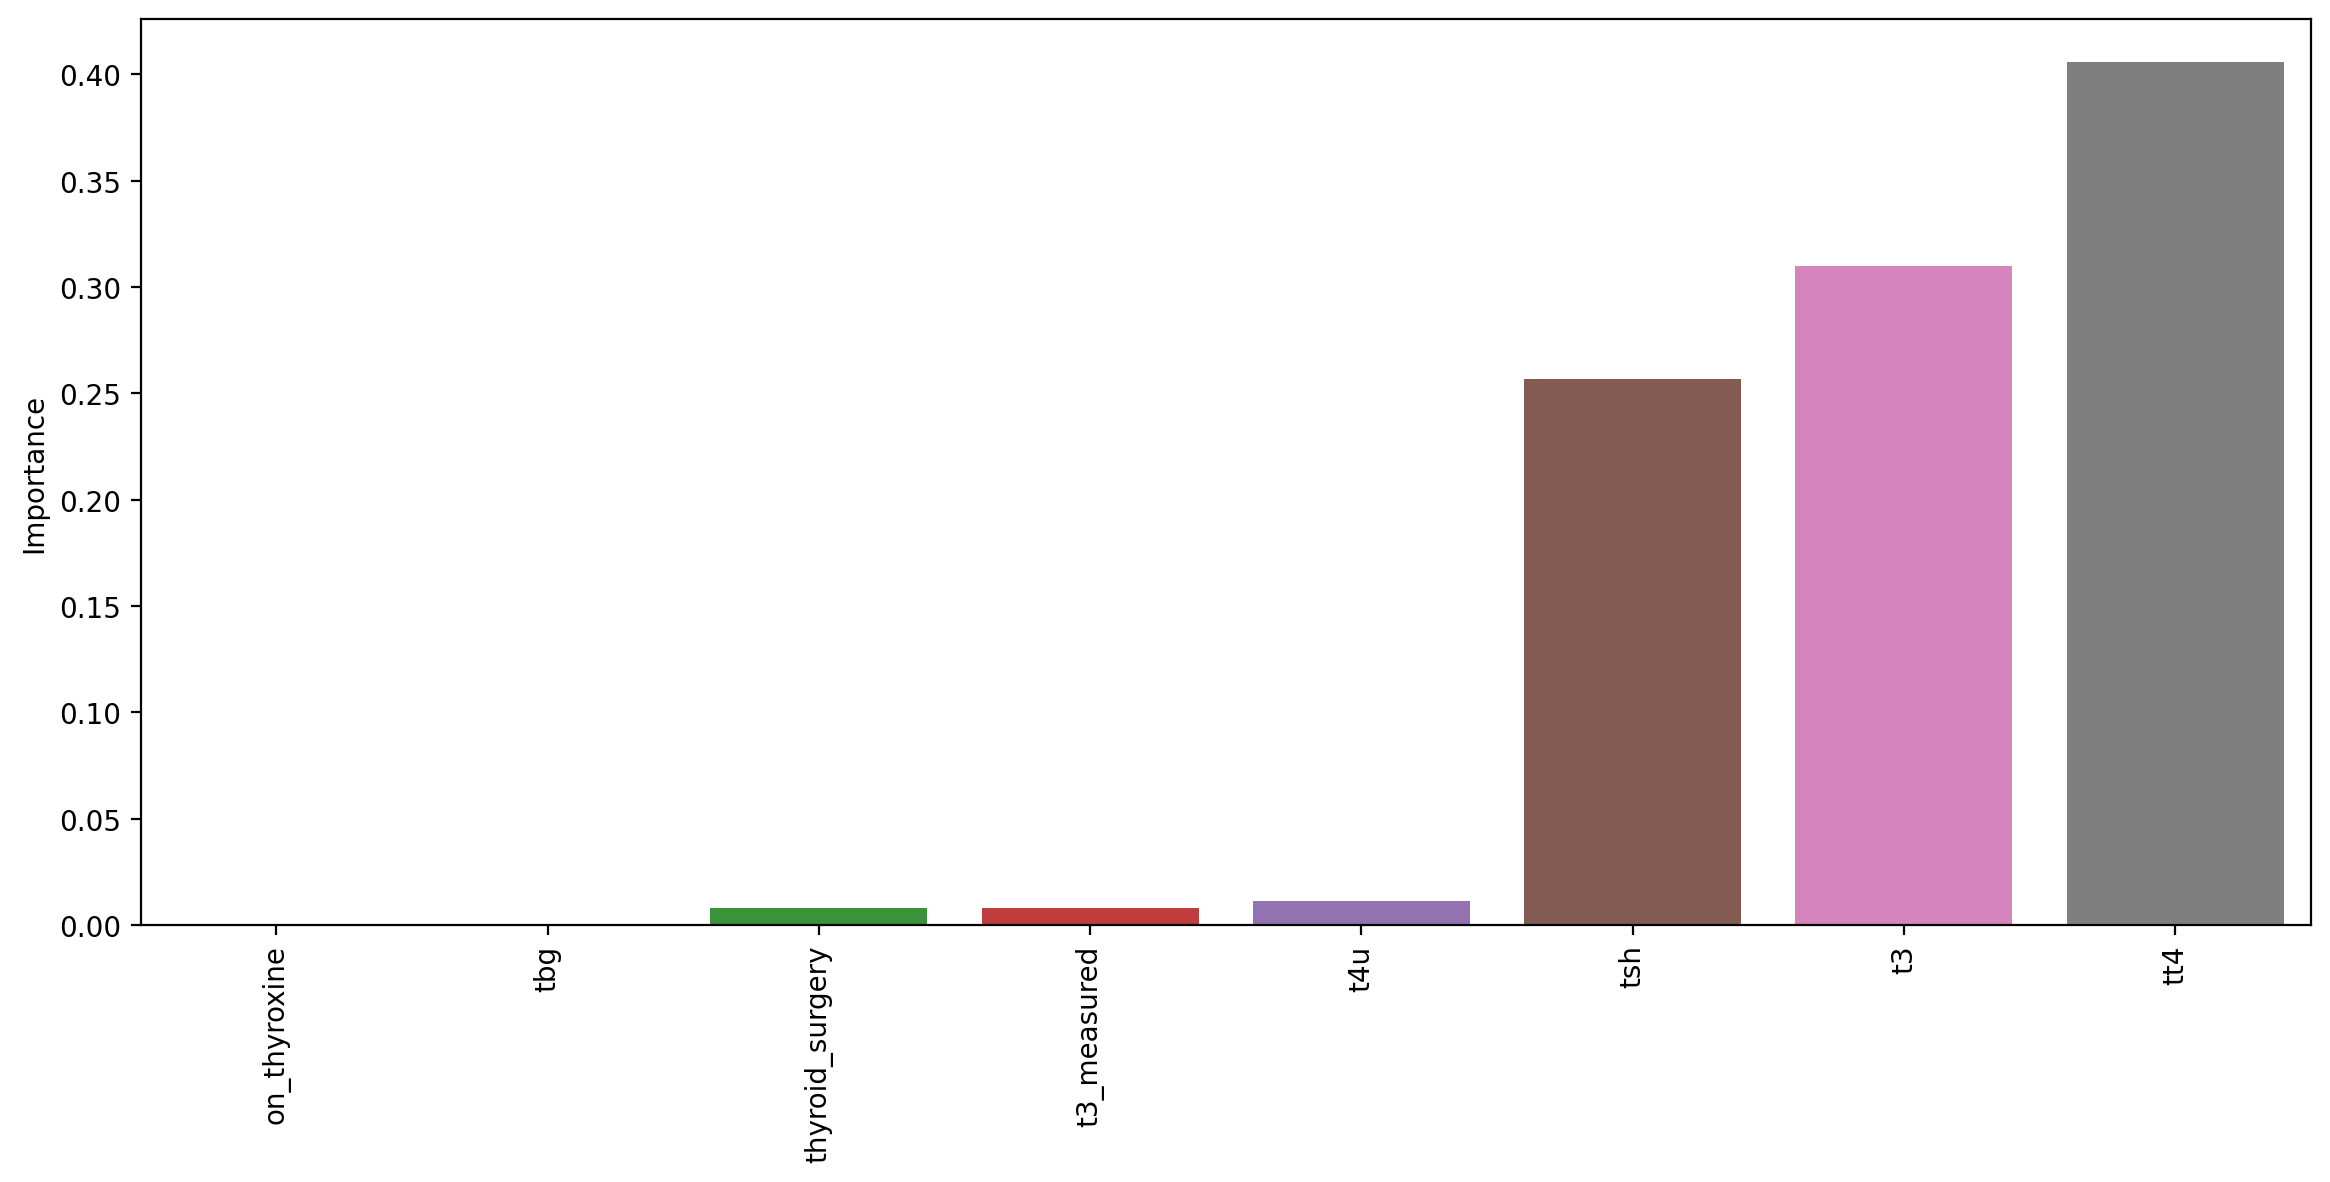

In [ ]:
# plotiing graphs of feature of importance
imp_feats = imp_feats.sort_values("Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

 * TT4 and T3 were the most impactful features



# Adaboost

In [ ]:
# Importing ada boost classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=.1)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)

In [ ]:
# Calculating accuracy score
y_pre = ada.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pre))

Accuracy_score: 0.9854368932038835


In [ ]:
# Calculating confusion matrix
print('confusion_matrix :',confusion_matrix(y_test,y_pre))

confusion_matrix : [[ 24   6]
 [  3 585]]


In [ ]:
# classification report of ada boost classification
print('classification report:',classification_report(y_test,y_pre))

classification report:               precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.99      0.99      0.99       588

    accuracy                           0.99       618
   macro avg       0.94      0.90      0.92       618
weighted avg       0.98      0.99      0.99       618



* We have misclassified  only 9 patients out of 618 patients and we have an accuracy score of 98.5%






# Support vector machine

In [ ]:
# importing train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# y prediction
y_prediction=model.predict(X_test)
print('Accuracy score:', accuracy_score(y_test,y_prediction))

Accuracy score: 0.9838187702265372


In [ ]:
# confusion matrix
print('confusion_matrix:',confusion_matrix(y_test,y_prediction))

confusion_matrix: [[ 21   9]
 [  1 587]]


In [ ]:
# classication report
print('classification report:',classification_report(y_test,y_prediction))

classification report:               precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.98      1.00      0.99       588

    accuracy                           0.98       618
   macro avg       0.97      0.85      0.90       618
weighted avg       0.98      0.98      0.98       618



* Our svm prediction model has an accuracy score of 98% and we have misclassified only 9 patients out of 618 patients.

## Svm grid searchcv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

In [ ]:
# 
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'C': 0.01, 'gamma': 'scale'}

In [ ]:
grid_pred = grid.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,grid_pred))

Accuracy_score: 0.9563106796116505


In [ ]:
# Calculating confusion matrix
print('confusion_matrix :',confusion_matrix(y_test,grid_pred))

confusion_matrix : [[ 26   4]
 [ 23 565]]


In [ ]:
print('classification report:',classification_report(y_test,grid_pred))

classification report:               precision    recall  f1-score   support

           0       0.53      0.87      0.66        30
           1       0.99      0.96      0.98       588

    accuracy                           0.96       618
   macro avg       0.76      0.91      0.82       618
weighted avg       0.97      0.96      0.96       618



*  Svm gridsearchcv had an accuracy of 95% and we have classified wrongly 27 patients out of 618 patients




## Observations


* The models performance for both decision trees and Support Vector Machines was above 98%. This is an indication of overfitting.
* This is an indication of overfitting.
* On  SVM GridSearchCV we used class balanced  and we got an accuracy score of 95%


## Follow up questions

### a). Did we have the right data?
* No, we had class imbalance

### b). Do we need other data to answer our question?
* Yes: Data with balanced classes

## Conculsion
* We need a data with balanced classes  so that we can be able to make a better predictive model  or use smote techique to balance our dataset